In [6]:
# Import the required libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Import the Dataset

In [2]:
# Create a path variable
path = r'C:\Users\sands\Documents\01-2022 Instacart Basket Analysis'

In [5]:
# Import the dataset
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge0124.pkl'))

### Creating Bar Charts

<AxesSubplot:>

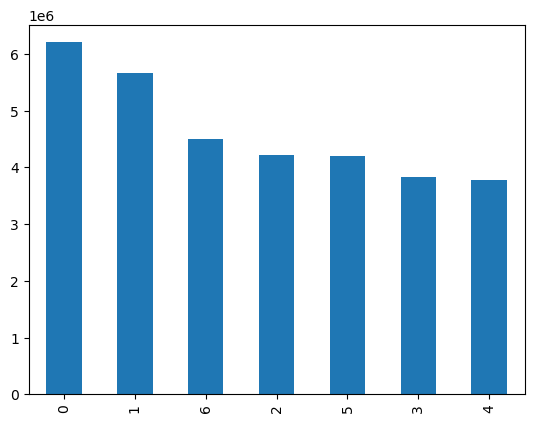

In [11]:
# Create a bar chart of the orders_day_of_week column
df['orders_day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

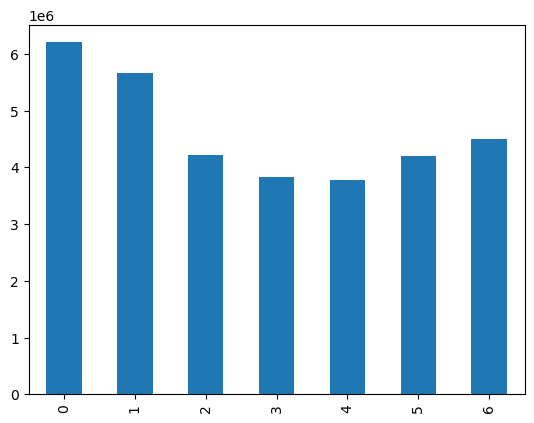

In [12]:
# Order the bars by the index in orders_day_of_week column
df['orders_day_of_week'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

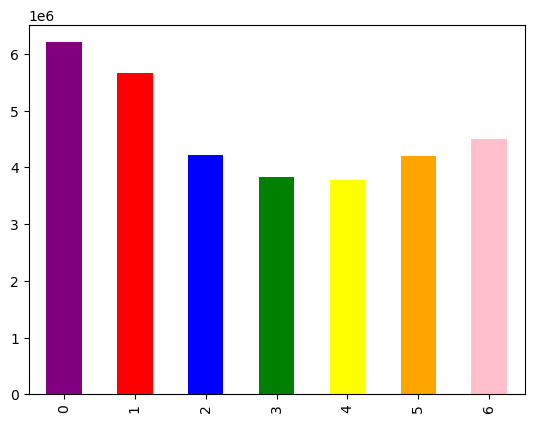

In [13]:
# Select different colors for the bars
df['orders_day_of_week'].value_counts().sort_index().plot.bar(color=['purple','red','blue','green','yellow','orange','pink'])

### Exporting Charts

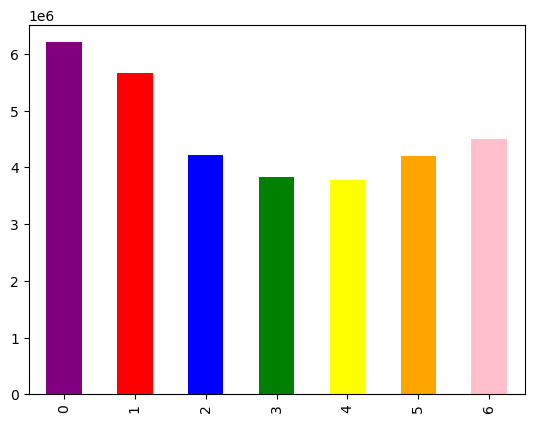

In [14]:
# To save a bar plot in Jupyter's memory
bar = df['orders_day_of_week'].value_counts().sort_index().plot.bar(color=['purple','red','blue','green','yellow','orange','pink'])

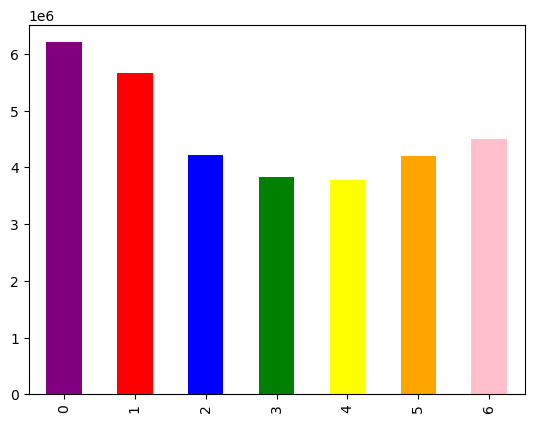

In [15]:
# Access the saved bar plot
bar.figure

In [16]:
# Save the visualizations in the porject folder
bar.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

### Creating histograms 

<AxesSubplot:ylabel='Frequency'>

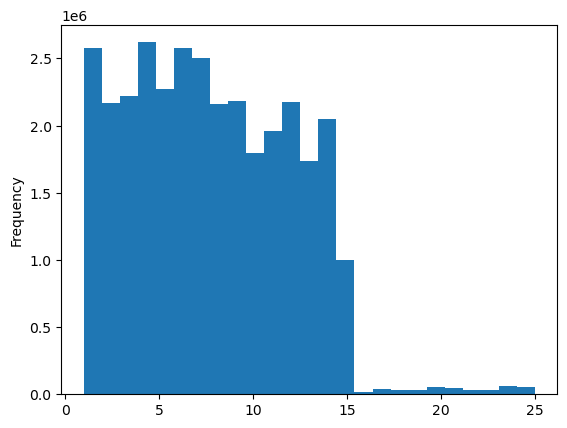

In [28]:
# Create a histgram of the prices column
df['prices'].plot.hist(bins=25)

In [19]:
df['prices'].max()

99999.0

In [20]:
df['prices'].mean()

11.980225638467232

In [21]:
df['prices'].median()

7.4

### Create a scatterplot to check for outliers

<AxesSubplot:xlabel='prices', ylabel='prices'>

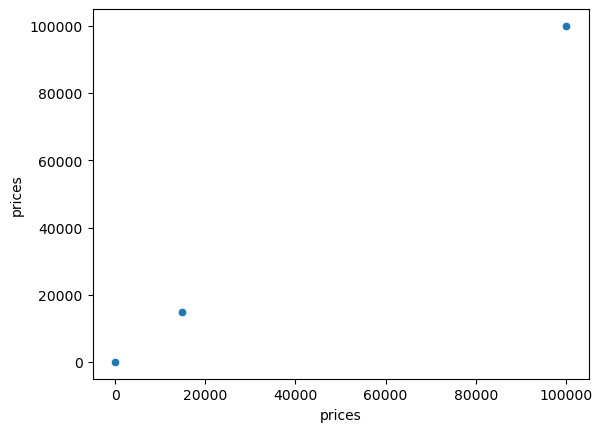

In [22]:
sns.scatterplot(x = 'prices', y = 'prices',data = df)

In [23]:
# Check if there are any items above 100$
df.loc[df['prices']> 100]

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,_merge,prices_range_loc,busiest days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_order_period,order_frequency_flag
10030345,912404,17,prior,12,2,14,5.0,21553,5,0,...,both,High-range product,Regularly busy,Most Orders,40,Regular Customer,108.648299,High Spender,5.0,Frequent customer
10030346,603376,17,prior,22,6,16,4.0,21553,3,1,...,both,High-range product,Regularly busy,Most Orders,40,Regular Customer,108.648299,High Spender,5.0,Frequent customer
10030347,3264360,135,prior,2,2,21,13.0,21553,6,0,...,both,High-range product,Regularly busy,Average Orders,4,New Customer,1154.792308,High Spender,12.0,Regular Customer
10030348,892534,135,prior,3,0,8,12.0,21553,3,1,...,both,High-range product,Busiest day,Average Orders,4,New Customer,1154.792308,High Spender,12.0,Regular Customer
10030349,229704,342,prior,8,1,19,30.0,21553,9,0,...,both,High-range product,Busiest day,Average Orders,16,Regular Customer,114.426619,High Spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,prior,29,0,8,4.0,33664,1,0,...,both,High-range product,Busiest day,Average Orders,39,Regular Customer,1106.743956,High Spender,4.0,Frequent customer
29166210,2363282,204099,prior,31,0,9,2.0,33664,1,1,...,both,High-range product,Busiest day,Most Orders,39,Regular Customer,1106.743956,High Spender,4.0,Frequent customer
29166211,3181945,204395,prior,13,3,15,8.0,33664,25,0,...,both,High-range product,Least busy,Most Orders,15,Regular Customer,451.153540,High Spender,5.0,Frequent customer
29166212,2486215,205227,prior,7,3,20,4.0,33664,8,0,...,both,High-range product,Least busy,Average Orders,12,Regular Customer,1178.381871,High Spender,12.0,Regular Customer


In [24]:
# Turn these outlier values to NaN
df.loc[df['prices']> 100 ,'prices'] = np.nan

In [25]:
# Check the maximum value
df['prices'].max()

25.0

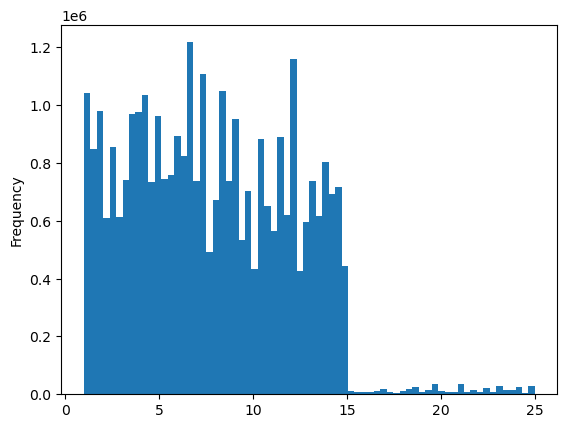

In [29]:
# Retry the histogram after the adhoc data fix
hist = df['prices'].plot.hist(bins= 70)

In [30]:
# Save the histogram
hist.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'histogram_prices.png'))

### Create a line chart

In [31]:
# Create a subset to optimize the memory usage
df_subset = df[: 2000000]

### Create a Sample of the Dataframe that represents the entire population

In [32]:
# Create a 70/30 split data
np.random.seed(4)

In [34]:
# Assign the random values to a list dev
dev = np.random.rand(len(df)) <= 0.7

In [35]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [36]:
# Divide the dataset into two categories
big = df[dev]
small = df[~dev]

In [38]:
# check the length of the df dataframe
len(df)

32404859

In [39]:
len(big) + len(small)

32404859

In [40]:
# Create a subset with only the required columns for line chart
df_2 = small[['orders_day_of_week','prices']]

In [ ]:
# Generate the line chart
line = sns.lineplot(data = df_2, x= 'orders_day_of_week', y='prices')